<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch02_09_Seaborn%EC%8B%A4%EC%8A%B5_tip%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.09. Seborn 실습 - tip 데이터


---

* 날짜: 2022-04-21
* 이름: 김민규


## 학습내용

    - Catplot을 이용해 범주별 데이터의 분포를 시각화 한다.
    - Catplot의 다양한 시각화 종류를 알아본다.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
tips = sns.load_dataset('tips')
tips.head()
```

In [204]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### | 데이터 기본 탐색


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### (2) Categorical plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.catplot(x=None, y=None, 
                hue=None, data=None,
                kind = 'strip' # {swarm, box, violin, boxen, point, bar, count} 
                row=None, col=None, 
                col_wrap=None, 
                units=None, seed=None, order=None,
                hue_order=None, row_order=None, 
                col_order=None, height=5, 
                aspect=1, orient=None, color=None, 
                palette=None, legend=True, 
                legend_out=True, 
                sharex=True, sharey=True, 
                margin_titles=False,
                facet_kws=None,
                jitter=True)

```

In [207]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

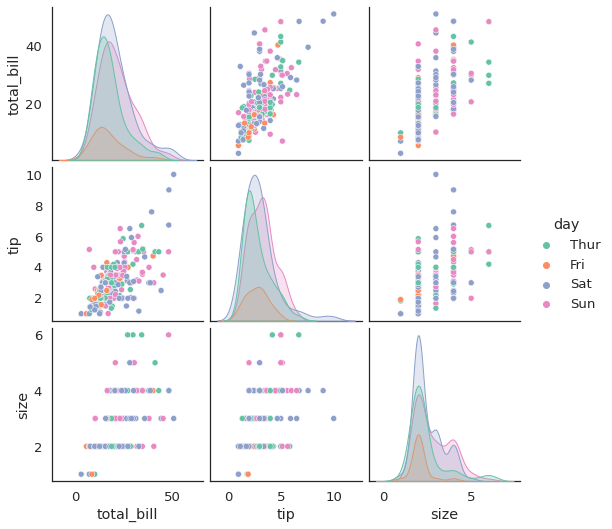

In [205]:
sns.pairplot(tips,
             hue='day',
             
             )

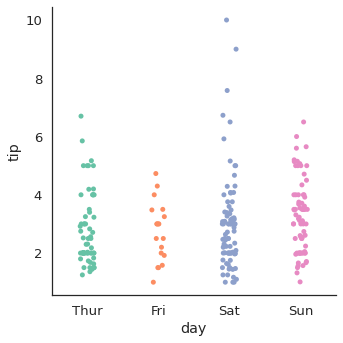

In [208]:
sns.catplot(data=tips, # 날짜별 tip의 분포표
            x='day',
            y='tip')

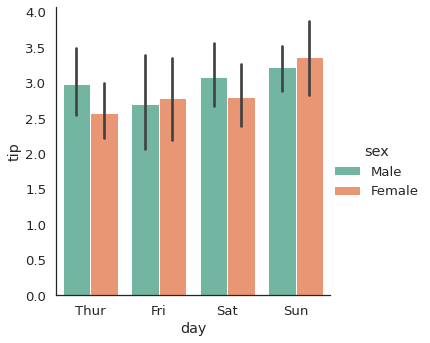

In [213]:
sns.catplot(data=tips, # 날짜별 tip의 분포표
            x='day',
            y='tip',
            kind='bar',  # {swarm, box, violin, boxen, point, bar, count, strip} 
            hue = 'sex') # 비슷한 값은 같은 라인에 분포

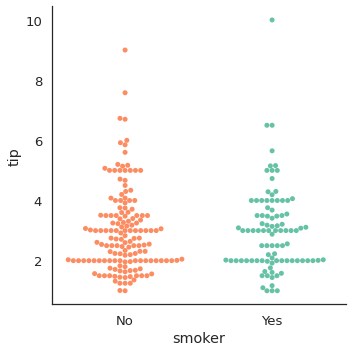

In [ ]:
# 흡연 여부에 따라 팁의 분포 그리기
sns.catplot(data=tips, # 날짜별 tip의 분포표
            order =['No','Yes'], #카테고리 순서
            x='smoker',
            y='tip',
            kind='swarm',
            hue = 'smoker') 

In [ ]:
tips.head()
#tips.time.unique()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


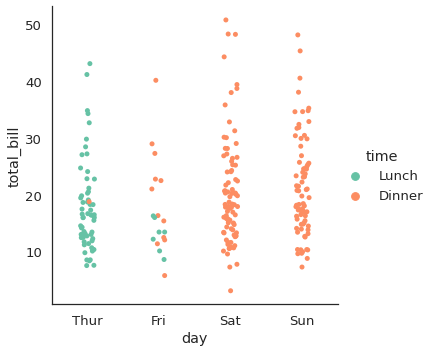

In [ ]:
# 요일 별로 total_bill 그리기 -> 시간별 색깔 따로
sns.catplot(data=tips,
            x='day',
            y='total_bill',
            c='time',
            hue='time',
            )

#### | 플롯 분할



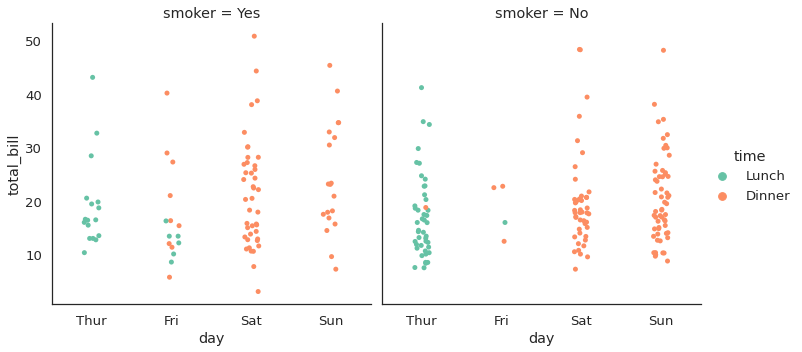

In [ ]:
sns.catplot(data=tips,
            x='day',
            y='total_bill',
            c='time',
            hue='time',
            col='smoker',
            
            )# 흡연여부로 나누기

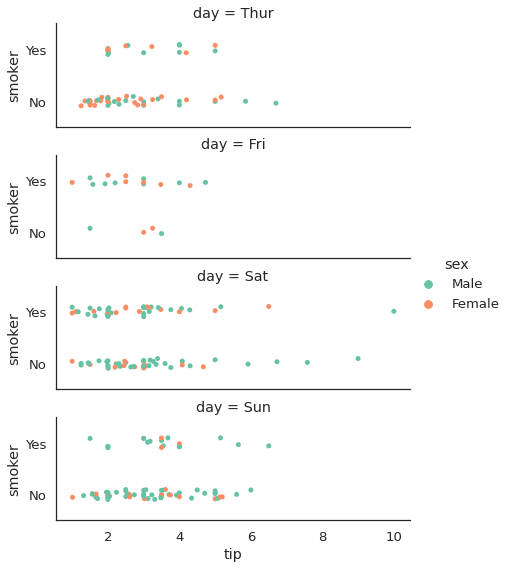

In [ ]:
# 수평 플롯(x=흡연여부, y=tip)
sns.catplot(data=tips,
            x='tip',
            y='smoker', # 행으로 분할 (날짜별)
            row = 'day',
            # size 조정(height, aspect)
            height=2, aspect=3,
            hue='sex',
            
            )

### (3) 범주별 통계 시각화



#### | Bar plots


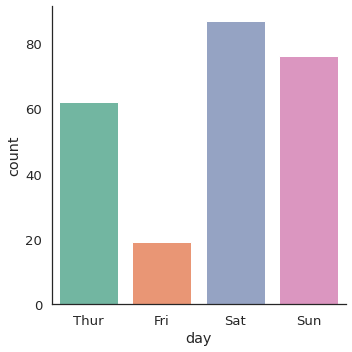

In [ ]:
sns.catplot(data=tips,
            x='day', # 날짜별 카운팅
             # kind=bar은 막대그래프
            kind='count',
            
            )

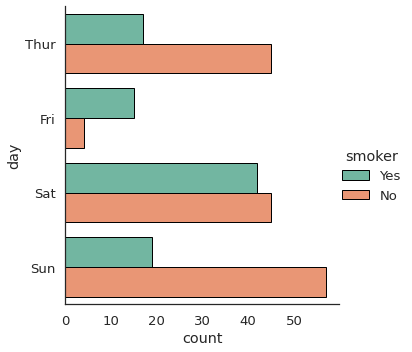

In [ ]:
sns.catplot(data=tips,
            y='day', # 날짜별 카운팅
             # kind=bar은 막대그래프
            kind='count',
            hue = 'smoker', # 흡연여부
            edgecolor='k',
            )

#### | Point plots



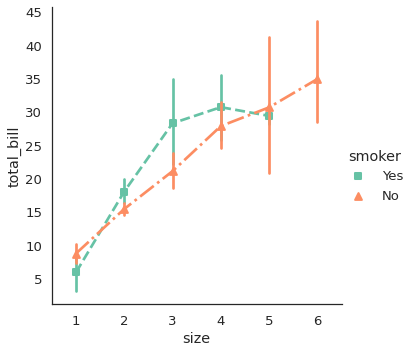

In [ ]:
sns.catplot(data=tips, # 포인트 통계
            x='size', # 날짜별 카운팅
             # kind=bar은 막대그래프
            y='total_bill',
            kind='point',
            hue = 'smoker',
            linestyles = ['--','-.'], # 선의 스타일을 다르게 줍니다.
            markers =['s','^'],
            markersize=[5,10],
            )

### (4) 범주별 분포 시각화


#### | Box plots


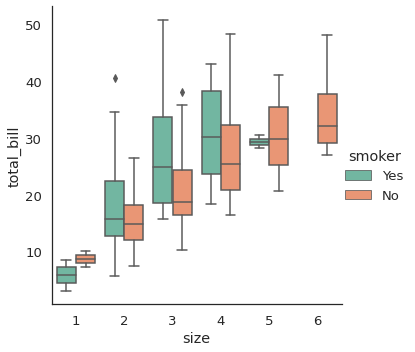

In [ ]:
sns.catplot(data=tips, # 포인트 통계
            x='size', # 날짜별 카운팅
             # kind=box는 막대그래프
            y='total_bill',
            kind='box',
            hue = 'smoker',
            
            )

#### | Violin plots

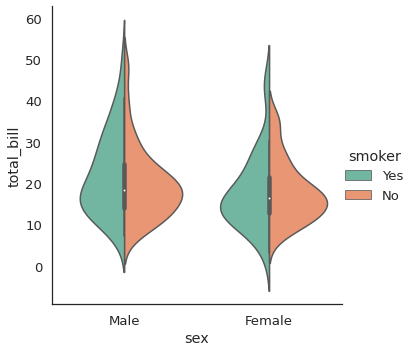

In [ ]:
sns.catplot(data=tips, # 포인트 통계
            x='sex', # 날짜별 카운팅
             # kind=box는 막대그래프
            y='total_bill',
            kind='violin', # 밀도를 나타냅니다.
            hue = 'smoker',
            split=True, # 표에 나오는 바이올린이 합쳐집니다.
            #inner='stick',
            
            )

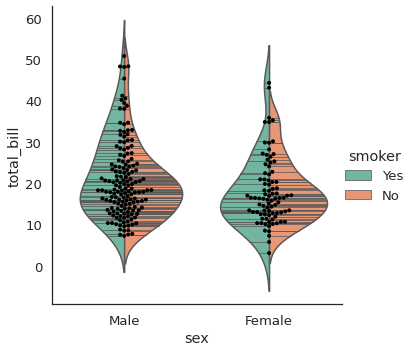

In [ ]:
g=sns.catplot(data=tips, # 포인트 통계
            x='sex', # 날짜별 카운팅
             # kind=box는 막대그래프
            y='total_bill',
            kind='violin', # 밀도를 나타냅니다.
            hue = 'smoker',
            split=True, # 표에 나오는 바이올린이 합쳐집니다.
            inner='stick',
            
            )
sns.swarmplot(data=tips, x='sex',y='total_bill', ax=g.ax,
              color='k',size=4)


## **과제: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('titanic')
df.head()
```

In [ ]:
df = sns.load_dataset('titanic')
df.head()
# df['survived'][0]=='False'
# df['survived'][1]=='True'#[('0','false'),('1','true')]

False

#### | 데이터 기본 탐색


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### (2) Categorical plot


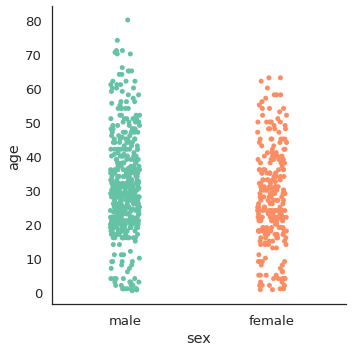

In [ ]:
sns.catplot(data=df,
            x='sex',
            y='age'
                )

#### | 플롯 분할


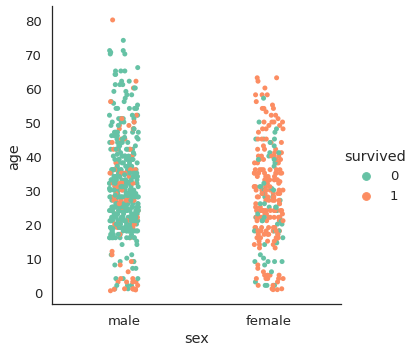

In [ ]:
sns.catplot(data=df,
            x='sex',
            y='age',
            hue='survived',
            

            
            

            )

### (3) 범주별 통계 시각화


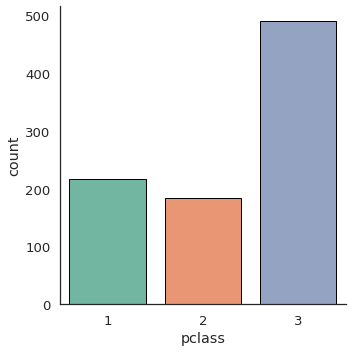

In [ ]:
sns.catplot(data=df,
            x='pclass', # 날짜별 카운팅
             # kind=bar은 막대그래프
            kind='count',
            edgecolor='k',
            
            )

#### | Bar plots

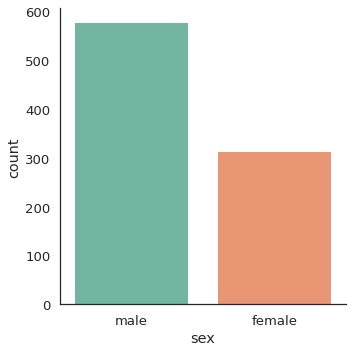

In [ ]:
sns.catplot(data=df,
            x='sex', # 날짜별 카운팅
             # kind=bar은 막대그래프
            kind='count',
            
            )

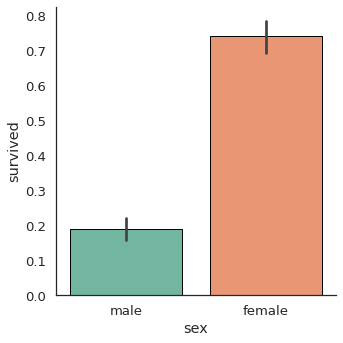

In [217]:
sns.catplot(data=df,
            x='sex',
            y='survived', 
            kind='bar',
             # 흡연여부
            edgecolor='k',
            )

#### | Point plots



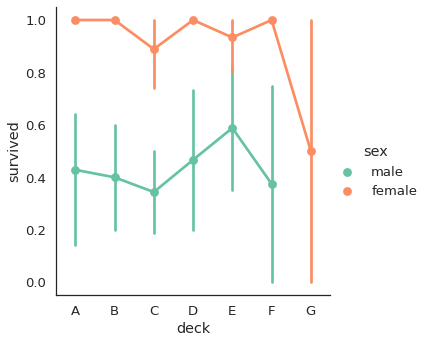

In [228]:
sns.catplot(data=df, # 포인트 통계
            x='deck', # 날짜별 카운팅
             # kind=bar은 막대그래프
            y='survived',
            kind='point',
            hue='sex'
            
            
            )

### (4) 범주별 분포 시각화


#### | Box plots


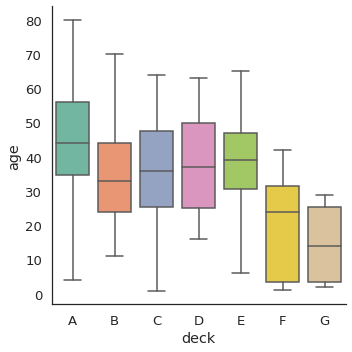

In [ ]:
sns.catplot(data=df, # 포인트 통계
            x='deck', # 날짜별 카운팅
             # kind=box는 막대그래프
            y='age',
            kind='box',
            
            
            )

#### | Violin plots

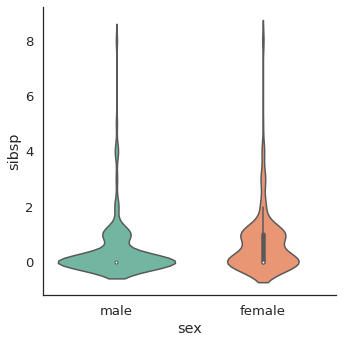

In [235]:
sns.catplot(data=df, # 포인트 통계
            x='sex', # 날짜별 카운팅
             # kind=box는 막대그래프
            y='sibsp',
            kind='violin',
            
            
            )
